In [ ]:
import scipy as sp
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy.signal import welch
import scipy.io

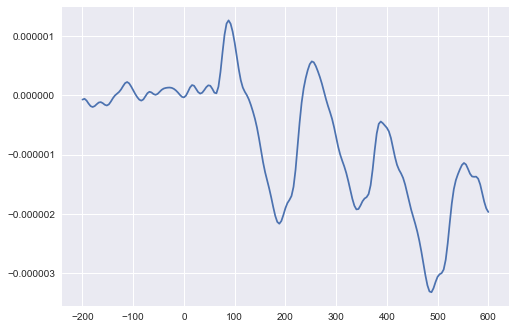

In [44]:
# Datos: epoch X Electrodo X serie temporal
m = sp.io.loadmat('P01.mat')
mm = m['data']

# epoch X serie temporal
elect8 = mm[:,7,:]
elect44 = mm[:,43,:]
elect80 = mm[:,79,:]
elect131 = mm[:,130,:]
elect185 = mm[:,184,:]

df8 = pd.DataFrame(elect8)
df44 = pd.DataFrame(elect44)
df80 = pd.DataFrame(elect80)
df131 = pd.DataFrame(elect131)
df185 = pd.DataFrame(elect185)

# Promedio de serie temporal x epoch. (matriz de 1 epoch con la serie promediada.)
df8_Media = df8.mean(axis=0)
df44_Media = df44.mean(axis=0)
df80_Media = df80.mean(axis=0)
df131_Media = df131.mean(axis=0)
df185_Media = df185.mean(axis=0)

# HAY QUE HACERLO CON PLOTLY! FUCK PLT.
plt.plot(np.linspace(-200, 600, 201), df8_Media)
plt.show()

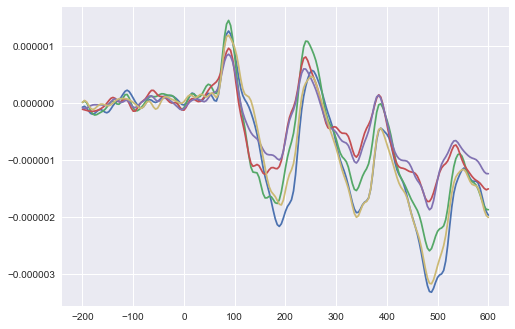

In [34]:
plt.plot(np.linspace(-200, 600, 201), df8_Media)
plt.plot(np.linspace(-200, 600, 201), df44_Media)
plt.plot(np.linspace(-200, 600, 201), df80_Media)
plt.plot(np.linspace(-200, 600, 201), df131_Media)
plt.plot(np.linspace(-200, 600, 201), df185_Media)
plt.show()

<class 'pandas.core.frame.DataFrame'>
(101,)
(894, 101)


/home/javier/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


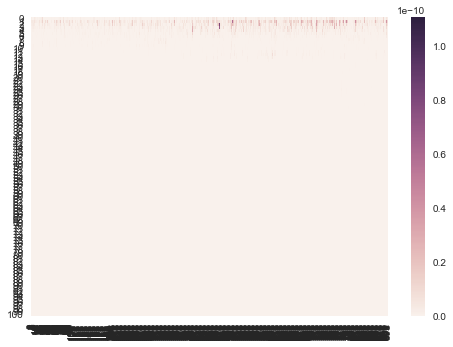

In [69]:
#promedio de series de electrodos x epoch  

media_electrodos['e44'] = df44_Media
media_electrodos['e80'] = df80_Media
media_electrodos['e131'] = df131_Media
media_electrodos['e185']=df185_Media
prom_electrodos= media_electrodos.mean(axis=0)

prom_electrodos=prom_electrodos.to_frame()
print(type(prom_electrodos))

#heatmap de elect80 fourier
welch80 = sp.signal.welch(elect80, noverlap=100, fs=250)
#welch[0] Me da el rango de frecuencias de elect
print(welch80[0].shape)
#welc[1] Me da una matriz de epoch X las frecuencias
print(welch80[1].shape)
#como queremos que el eje x sea los epochs transponemos welch[1]
sn.heatmap(np.transpose(welch80[1]))
plt.show()

#falta arreglar colores y etiquetas y hacer el promedio de todos los heatmaps(5 electrodos VER DE USAR GREYSCALE PARA LOS ESPECTOGRAMAS!).

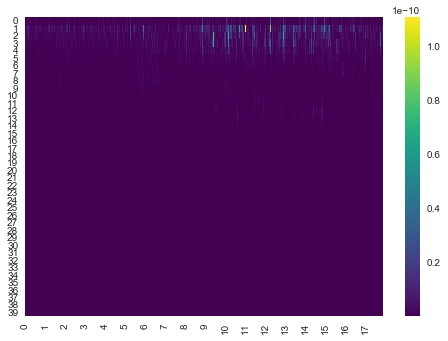

In [108]:
index = (np.abs(welch80[0]-50)).argmin()
frecuencias = welch80[0][:index]
potencias = welch80[1][:, :index]
sn.heatmap(np.transpose(potencias), cmap='viridis')
listbla = [50 * x for x in range(0,18)]
plt.xticks(listbla)
plt.show()

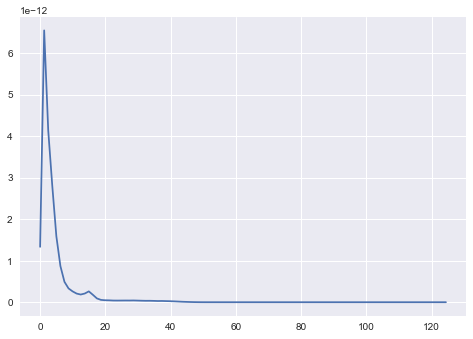

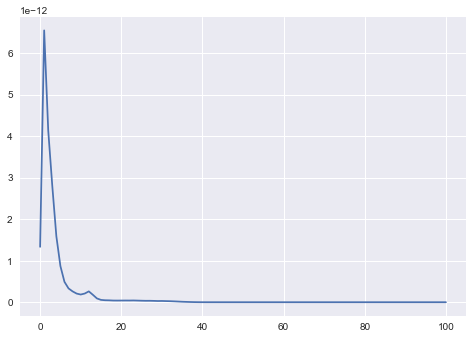

In [95]:
#promedio de potencias de frecuencias por epoch
plt.plot(welch80[0],np.transpose(welch80[1].mean(axis=0)))
plt.show()

#hacer este grafico para los otros electrodos y plotear en el mismo grafico